<a href="https://colab.research.google.com/github/Caue-Aramaki/My-Tensorflow-Playground/blob/main/Testing_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links and references:

13 Free Japanese Datasets: https://lionbridge.ai/datasets/japanese-language-text-datasets/

Svg library svglib for python: https://pypi.org/project/svglib/

Svg to Png: https://svgtopng.com/

KanjiVG Radicals (yagays_kanjivg-radical): https://github.com/yagays/kanjivg-radical

KanjiVG Github: https://github.com/KanjiVG/kanjivg

*Another Kanji Dataset: https://github.com/mifunetoshiro/kanjium

In case one need to use SVG and conversion to PNG:
```
!pip install cairosvg

#opens a test SVG file and draws using reportlabs and svglib conversion
import cairosvg
from IPython.display import display, Image

kanji = open('/content/drive/MyDrive/ProjKanji/065c4.svg', 'r')
drawing = cairosvg.svg2png(bytestring=kanji.read().encode('utf-8'))
display(Image(drawing))

print('Success')
```

# **Preparation**

In [ ]:
!pip install tensorflow

In [ ]:
#tensorflow libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

#kanji dataset reading libraries

import json
import IPython.display
import pandas

print('Success')

Success


In [ ]:
#choosed tensorflow 2.x (latest version)

%tensorflow_version 2.x
print(tf.__version__)
print('Success')

2.5.0
Success


# **Tensorflow Basics**

In [ ]:
tf.random.set_seed(42)
tensor_D = tf.random.uniform(shape=(3, 5))
tensor_D = tf.cast(tensor_D, dtype=tf.float16)
print()
print(tensor_D)

print()
print(tf.argmax(tensor_D))

print()
print(tensor_D[tf.argmax(tensor_D)[1]][1])


tf.Tensor(
[[0.6646  0.441   0.3528  0.4646  0.03366]
 [0.6846  0.74    0.8726  0.2263  0.2231 ]
 [0.3103  0.722   0.1332  0.548   0.5747 ]], shape=(3, 5), dtype=float16)

tf.Tensor([1 1 1 2 2], shape=(5,), dtype=int64)

tf.Tensor(0.74, shape=(), dtype=float16)


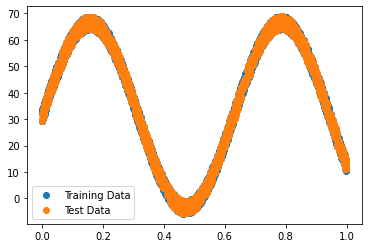

In [ ]:
# X = np.array([2, 4, 5, 7, 9, 10, 11, 16, 17, 18, 23])
# Y = np.array([1, 3, 8, 9, 8, 13, 15, 17, 18, 24, 26])

train_data_size = 5000
test_data_size = 2000

def generator_function(input_list, seed):
  tf.random.set_seed(seed)
  return np.sin(input_list * 10) * 35 + tf.random.uniform(shape=(len(input_list),1)) * 5 + 29
  # return pow(input_list, 2) * 35 + tf.random.uniform(shape=(len(input_list),1)) * 5 + 29

# Creating train data

tf.random.set_seed(42)
X_train = tf.random.uniform(shape=(train_data_size,1))

Y_train = generator_function(X_train, 53)

# Creating test data

tf.random.set_seed(55)
X_test = tf.random.uniform(shape=(test_data_size,1))

Y_test = generator_function(X_test, 57)

plt.scatter(X_train, Y_train, label="Training Data") # Training data, blue
plt.scatter(X_test, Y_test, label="Test Data") # Test data, orange
plt.legend()

In [ ]:
# Creating Model

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential(name="Predict_Sin")

model.add(tf.keras.layers.Dense(5, activation=None, name="Input_Hidden"))
model.add(tf.keras.layers.Dense(17, activation="relu", name="Hidden_1"))
model.add(tf.keras.layers.Dense(15, activation="relu", name="Hidden_2"))
model.add(tf.keras.layers.Dense(5, activation=None, name="Final_Hidden"))

model.add(tf.keras.layers.Dense(1))


# Compile Model # MAE mean absolute error # SGD Stochastic gradient descent

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.03,
    decay_steps=10000,
    decay_rate=0.999)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule), loss="mse", metrics=["mae"])



# Train Model / Fit

model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 626.8692 - mae: 21.4662
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 272.6760 - mae: 13.3107
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 119.8728 - mae: 7.4781
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 77.4588 - mae: 6.0895
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 21.9785 - mae: 3.4257
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 5.3836 - mae: 1.8432
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 10.1263 - mae: 2.3870
Epoch 8/100
157/157 [==============================] - 0s 1ms/step - loss: 5.6188 - mae: 1.8819
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 5.1256 - mae: 1.7987
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 7.8957 - mae: 2.1659
Epoch 11/100
157/157 [======

Model: "Predict_Sin"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Hidden (Dense)         (None, 5)                 10        
_________________________________________________________________
Hidden_1 (Dense)             (None, 17)                102       
_________________________________________________________________
Hidden_2 (Dense)             (None, 15)                270       
_________________________________________________________________
Final_Hidden (Dense)         (None, 5)                 80        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 468
Trainable params: 468
Non-trainable params: 0
_________________________________________________________________


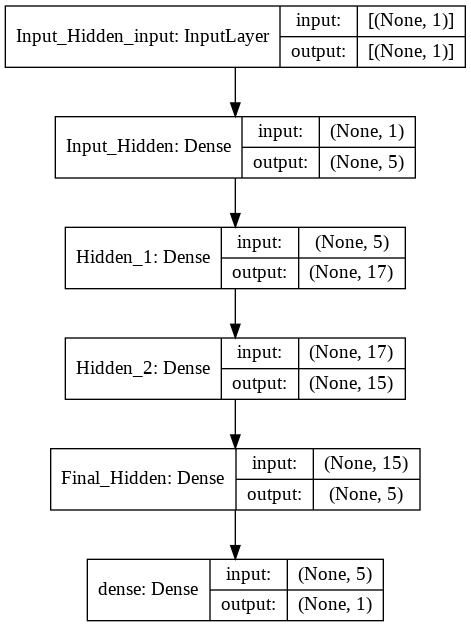

In [ ]:
model.summary()
plot_model(model=model, show_shapes=True)

Variance:  tf.Tensor(2.7573583, shape=(), dtype=float32)



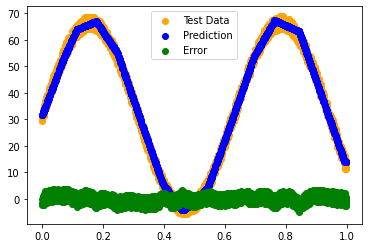

In [ ]:
# Predict

Y_predict = model.predict(X_test)

Y_error = tf.constant(Y_test - Y_predict)

plt.scatter(X_test, Y_test, c='orange', label="Test Data") # Real Data, Orange
plt.scatter(X_test, Y_predict, c='blue', label="Prediction") # Prediction, Blue
plt.scatter(X_test, Y_error, c='green', label="Error") # Error, Green

plt.legend()

print("Variance: ", tf.math.reduce_variance(tf.transpose(Y_error)))
print()

Variance:  tf.Tensor(2.7573583, shape=(), dtype=float32)



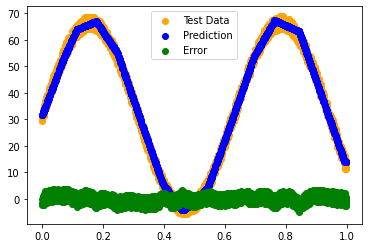

In [ ]:
# Save model
model.save("sin_predict_tensorflow.h5")

# Load model

loaded_model = tf.keras.models.load_model("/content/sin_predict_tensorflow.h5")

# Test loaded model

# Predict

Y_predict = loaded_model.predict(X_test)

Y_error = tf.constant(Y_test - Y_predict)

plt.scatter(X_test, Y_test, c='orange', label="Test Data") # Real Data, Orange
plt.scatter(X_test, Y_predict, c='blue', label="Prediction") # Prediction, Blue
plt.scatter(X_test, Y_error, c='green', label="Error") # Error, Green

plt.legend()

print("Variance: ", tf.math.reduce_variance(tf.transpose(Y_error)))
print()

# **Bigger Tensorflow Problem**

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [ ]:
# Import the dataset using pandas
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

print(insurance["sex"]); print()

# Transforms categorical information into numerical (using pandas, transforms into one_hot or dummies)

# insurance = pd.get_dummies(insurance) Uses one hot encoding, but we will use sklearn from now on

insurance

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer (Normalizing our data)

ct = make_column_transformer(
    (MinMaxScaler(), ["age", 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Let us split the data into X features and Y outcomes
X = insurance.drop('charges', axis = 1)
Y = insurance['charges']

# Split the data into test data and training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

# Fit the transformer into only the training data 
ct.fit(X_train)

# Normalize both training and test data, and encode with one hot
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

# Visualize

X_train

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

9/9 [==============================] - 0s 2ms/step - loss: 3160.9927 - mae: 3160.9927


Text(0.5, 0, 'epochs')

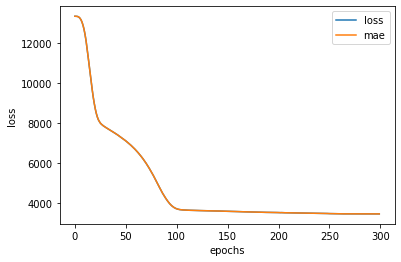

In [ ]:
# Creating model

tf.random.set_seed(42)

# Model

insurance_model = tf.keras.Sequential([
                                       
tf.keras.layers.Dense(20, activation=None, name="Hidden_1"),
tf.keras.layers.Dense(30, activation=None, name="Hidden_2"),
tf.keras.layers.Dense(20, activation=None, name="Hidden_3")

],
name = "insurance_predict"
)

# Compile


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


insurance_model.compile(
    
  loss = tf.keras.losses.mean_absolute_error,
  optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
  metrics = ['mae']
  
)

# Train
training = insurance_model.fit(X_train, Y_train, epochs = 300, verbose = 0)

# Evaluate
insurance_model.evaluate(X_test, Y_test), "Test Score"

# Plot the loss curve
pd.DataFrame(training.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

9/9 [==============================] - 0s 2ms/step - loss: 43027776.0000 - mae: 3161.3987


Text(0.5, 0, 'epochs')

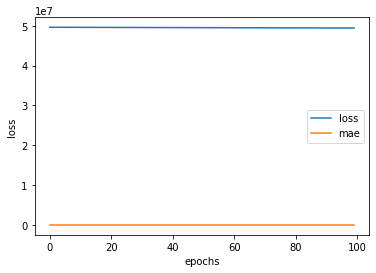

In [ ]:
# Let us refine the training with lower learning rate and more epochs
# Compile


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.000001,
    decay_steps=10000,
    decay_rate=0.9)


insurance_model.compile(
    
  loss = tf.keras.losses.mean_squared_error,
  optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
  metrics = ['mae']
  
)

# Train
training = insurance_model.fit(X_train, Y_train, epochs = 100, verbose = 0)

# Evaluate
insurance_model.evaluate(X_test, Y_test), "Test Score"

# Plot the loss curve
pd.DataFrame(training.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **Image Super Resolution with ISR (on tensorflow)**

In [ ]:

# import numpy as np
# from PIL import Image

# img = Image.open('/content/data/input/test_images/s - 1421056.png').convert("RGB")
# np.array(img).shape

# from ISR.models import RRDN


# rrdn = RRDN(weights='gans')

# rrdn.model.save("RRDN.h5")

# # sr_img = model.predict(np.array(img))
# # Image.fromarray(sr_img)



In [ ]:

# import numpy as np
# from PIL import Image
# import h5py

# img = Image.open('/content/data/input/test_images/s - 1421056.png').convert("RGB")
# # img = img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

# from tensorflow import keras

# rrdn = keras.models.
# # rrdn.load_weights('/content/rrdn_model.hdf5')

# sr_img = rrdn.predict(np.array(img))

# # sr_img = sr_img.resize(size=(sr_img.size[0]*4, sr_img.size[1]*4), resample=Image.BICUBIC)

# Image.fromarray(sr_img)

# **Chatter Bot Python**

In [ ]:
!pip install chatterbot

     |████████████████████████████████| 71kB 2.6MB/s 
     |████████████████████████████████| 1.3MB 5.1MB/s 
  Found existing installation: SQLAlchemy 1.4.15
    Uninstalling SQLAlchemy-1.4.15:
      Successfully uninstalled SQLAlchemy-1.4.15


In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

# shakes = pd.read_fwf("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")

# shakes = np.array(tf.squeeze(np.array(shakes)), dtype=np.str).tolist()

# print(shakes[0])

# Create a new chat bot named Charlie
chatbot = ChatBot('Charlie')

trainer = ListTrainer(chatbot)

trainer.train([
    "Hi, can I help you?",
    "Sure, I'd like to book a flight to Iceland.",
    "Your flight has been booked.",
    "How are you today?", "I am fine, thanks."
])

# trainer.train(shakes)

# Get a response to the input text 'I would like to book a flight.'

response_2 = "Hello"

# print(chatbot.get_response(input()))

print(chatbot.get_response("How are you today?"))

# while True:
#   response_1 = chatbot.get_response(response_2)
#   print(response_1)
#   response_2 = chatbot.get_response(response_1)
#   print(response_2)

List Trainer: [####################] 100%
I am fine, thanks.


# **Tensorflow Binary Classifier**

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, Y):
  # defining the axis and boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  # meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Y values
  y_pred = model.predict(x_in)

  # Check for multi class prediction
  if len(y_pred[0]) > 1:
    # Multi class
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    # Binary
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


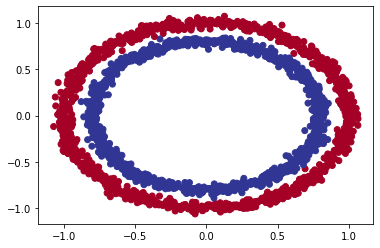

In [ ]:
# X = np.array([2, 4, 5, 7, 9, 10, 11, 16, 17, 18, 23])
# Y = np.array([1, 3, 8, 9, 8, 13, 15, 17, 18, 24, 26])

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

n_samples = 2000

X, Y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu) 

import pandas as pd 

circles = pd.DataFrame({ "X0":X[:,0] , "X1":X[:,1], "Label":Y})

circles.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)



13/13 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.6775 - precision: 0.6135
Loss: 0.5799574851989746
Accuracy: 67.75%
Precision: 61.35%


Text(0.5, 1.0, 'Accuracy/Loss X Epochs')

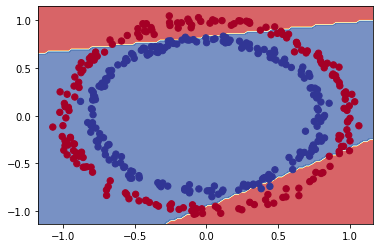

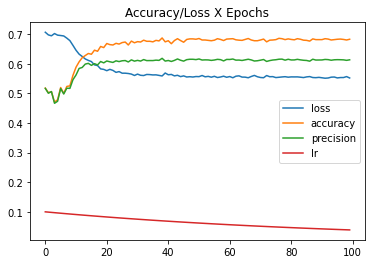

In [ ]:
# Creating Model

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

classifier_model = tf.keras.Sequential([
                                       
# tf.keras.layers.InputLayer(input_shape=None, name="Input"),

tf.keras.layers.Dense(3, activation=tf.keras.activations.sigmoid, name="Hidden_1"),
tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid, name="Hidden_2"),

tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid, name="Hidden_3")

],
name = "binary_classifier"
)


# Compile Model # MAE mean absolute error # SGD Stochastic gradient descent

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)



classifier_model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss="binary_crossentropy", 
    metrics=["accuracy", tf.keras.metrics.Precision()])

# Create a learning rate callback

def custom_schedule(epoch):
  return 1e-1 * 1.1**(-epoch/10)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: custom_schedule(epoch))

# Train Model / Fit

epoch_amount = 100

training_history = classifier_model.fit(X_train, Y_train, 
                                        epochs=epoch_amount, verbose=0,
                                        callbacks=[lr_scheduler])


# Plottings

plot_decision_boundary(model=classifier_model, X=X_test, Y=Y_test)

loss, accuracy, precision = classifier_model.evaluate(X_test, Y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy * 100):.2f}%")
print(f"Precision: {(precision * 100):.2f}%")

pd.DataFrame(training_history.history).plot()
plt.title("Accuracy/Loss X Epochs")

Text(0.5, 1.0, 'LR X Loss')

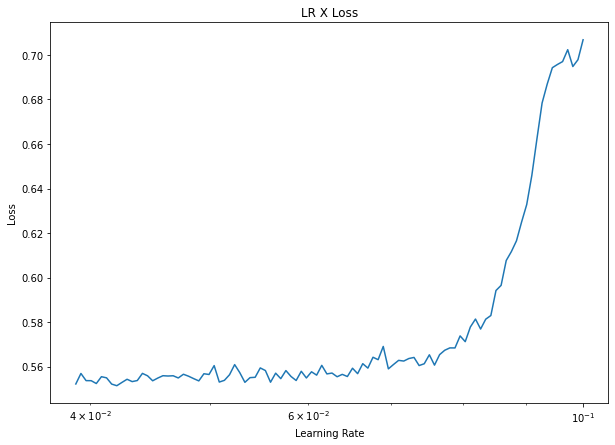

In [ ]:
lrs = custom_schedule(tf.range(epoch_amount))
plt.figure(figsize= (10, 7))
plt.semilogx(lrs, training_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("LR X Loss")

In [ ]:
from sklearn.metrics import confusion_matrix

Y_predict = tf.round(classifier_model.predict(X_test))

confusion_matrix(Y_test, Y_predict[:,0])/200

array([[0.355, 0.63 ],
       [0.015, 1.   ]])

# **Multiclass Classifier**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
from PIL import Image

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

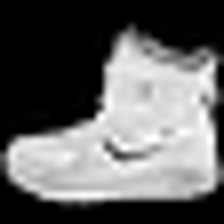

In [ ]:
def plot_image(array):
  img = np.array(array)
  img = Image.fromarray(img)
  img = img.resize(size=(img.size[0]*8, img.size[1]*8), resample=Image.BICUBIC)
  return img

plot_image(train_data[0])

In [ ]:

train_data = train_data / 255
test_data = test_data / 255


print(f"Training data: {train_data[0]}")
print(f"Training label: {train_labels[0]}")

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

Training data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.

10

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model 
fashion_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # tf.keras.layers.Conv2D(2, 2),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model 
fashion_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Learning Scheduler

epoch_amount = 10

def custom_schedule(epoch):
  return 1e-3 * (0.9**(epoch/20))
  # return 1e-3

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: custom_schedule(epoch))

# Fit the model
training_history = fashion_model.fit(train_data,
                            train_labels,
                            epochs=epoch_amount,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_scheduler])


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6401 - val_accuracy: 0.7825
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5943 - accuracy: 0.7914 - val_loss: 0.6246 - val_accuracy: 0.7785
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7980 - val_loss: 0.6075 - val_accuracy: 0.7889
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8008 - val_loss: 0.6167 - val_accuracy: 0.7884
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5854 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5487 - accuracy: 0.8062 - val_loss: 0.6108 - val_accuracy:

313/313 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.8019
Loss: 0.5661773681640625
Accuracy: 80.19%


Text(0.5, 1.0, 'LR X Loss')

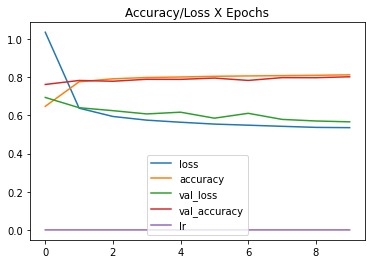

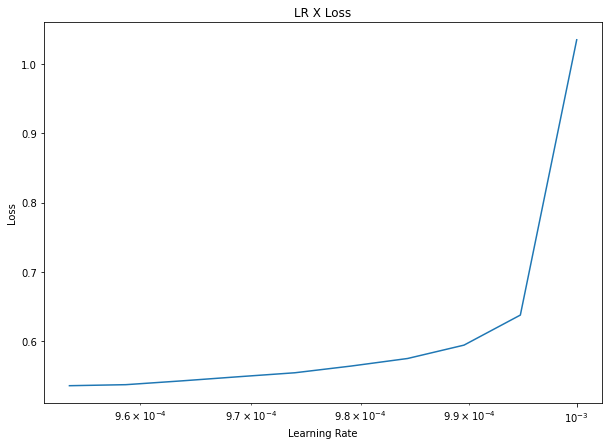

In [ ]:
loss, accuracy = fashion_model.evaluate(test_data, test_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy * 100):.2f}%")

pd.DataFrame(training_history.history).plot()
plt.title("Accuracy/Loss X Epochs")


lrs = custom_schedule(tf.range(epoch_amount))

plt.figure(figsize= (10, 7))
plt.semilogx(lrs, training_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("LR X Loss")

In [ ]:
class_names[np.argmax(tf.squeeze(fashion_model.predict(test_data[0:1])))], class_names[test_labels[0]]

('Ankle boot', 'Ankle boot')

In [ ]:
# Code copied from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/video_notebooks/02_neural_network_classification_in_tensorflow_video.ipynb

import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

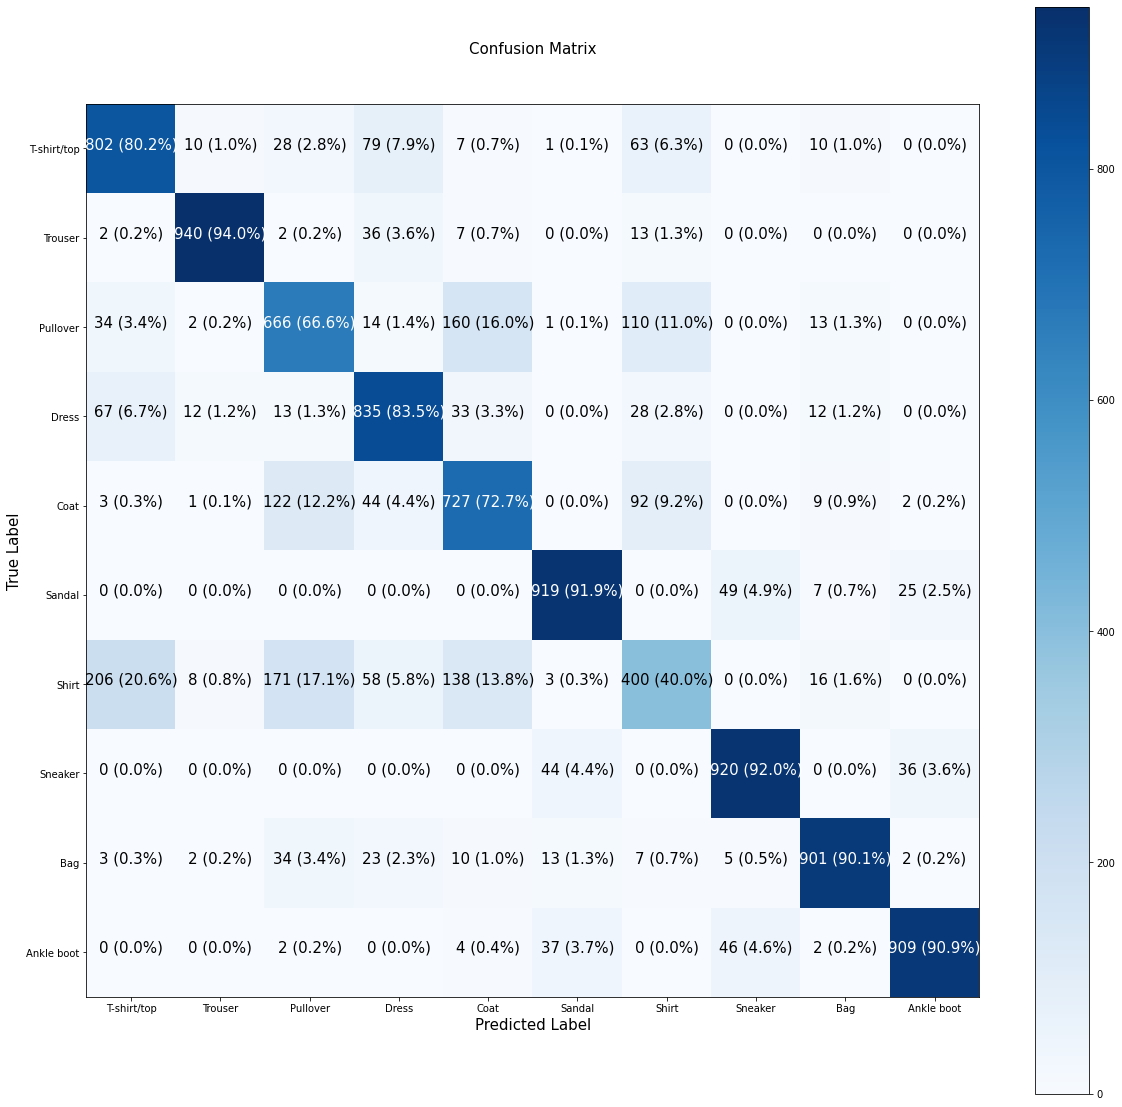

In [ ]:
test_pred = fashion_model.predict(test_data).argmax(axis=1)

make_confusion_matrix(test_labels, test_pred, class_names, figsize=(20,20), text_size=15)

In [ ]:
incorrect_indexes = []

for n in range(0, 10000):
  if test_labels[n] != test_pred[n]:
    incorrect_indexes.append(n)

print(incorrect_indexes)

[12, 17, 20, 23, 25, 27, 29, 40, 45, 48, 50, 51, 53, 54, 66, 68, 72, 74, 89, 98, 101, 103, 107, 120, 127, 135, 136, 147, 150, 151, 153, 170, 172, 183, 192, 193, 209, 217, 219, 222, 227, 239, 241, 243, 244, 247, 249, 255, 269, 273, 282, 285, 286, 289, 306, 309, 311, 312, 316, 320, 324, 337, 344, 354, 367, 382, 389, 394, 396, 408, 409, 413, 441, 444, 454, 457, 459, 460, 465, 471, 474, 477, 478, 483, 490, 499, 506, 512, 526, 527, 529, 530, 531, 544, 546, 548, 557, 558, 560, 561, 562, 563, 565, 569, 570, 572, 578, 584, 586, 587, 589, 594, 595, 598, 607, 608, 616, 622, 623, 628, 632, 634, 635, 639, 661, 663, 664, 669, 670, 671, 674, 686, 688, 689, 697, 701, 702, 711, 716, 721, 722, 725, 726, 732, 735, 750, 753, 760, 761, 780, 787, 800, 801, 805, 844, 846, 851, 852, 858, 875, 881, 885, 888, 890, 898, 902, 905, 907, 909, 916, 921, 924, 925, 926, 930, 935, 938, 946, 956, 960, 965, 966, 968, 971, 976, 977, 979, 986, 993, 994, 996, 1004, 1005, 1009, 1016, 1019, 1025, 1026, 1043, 1046, 1053, 1055

In [ ]:
for n in range(0, len(incorrect_indexes)):
  index = incorrect_indexes[n]
  display(plot_image(test_data[index])); print(class_names[test_pred[index]], class_names[test_labels[index]])
  input()

OSError: ignored

<PIL.Image.Image image mode=F size=224x224 at 0x7FFA74C1DED0>

Sandal Sneaker


KeyboardInterrupt: ignored